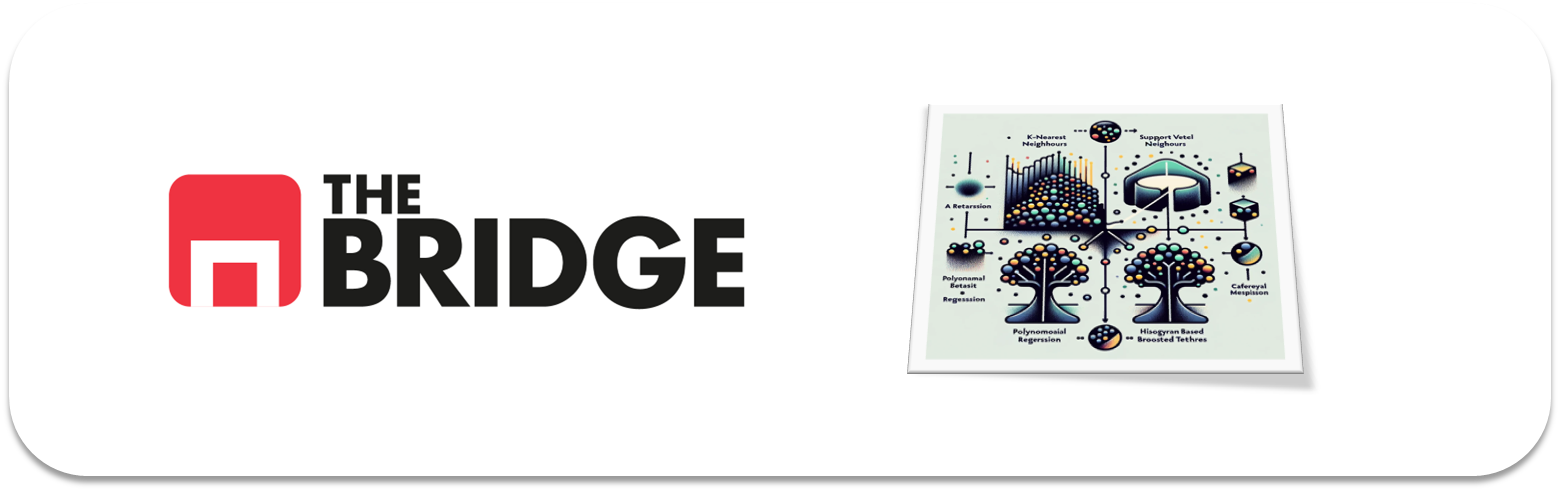

## PRÁCTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import toolbox_ML_extra as tb

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


| Variable                             | Descripción                                                                                                                                                            |
| ------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| SeriousDlqin2yrs                     | Persona con 90 o más días de morosidad en los últimos dos años (binaria, sí o no)                                                                                      |
| RevolvingUtilizationOfUnsecuredLines | Saldo total de tarjetas de crédito y líneas de crédito personales (salvo las inmobiliarias y las que no son a plazos), dividido por la suma de los límites de crédito. |
| age                                  | Edad de la persona que solicita el crédito (prestatario) en años                                                                                                       |
| NumberOfTime30-59DaysPastDueNotWorse | Nº de veces que el prestatario se ha retrasado en el pago entre 30 y 59 días como máximo en los últimos 2 años                                                         |
| DebtRatio                            | Pagos mensuales de deudas, pensión alimenticia, gastos de manutención divididos por los ingresos brutos mensuales                                                      |
| MonthlyIncome                        | Salario mensual                                                                                                                                                        |
| NumberOfOpenCreditLinesAndLoans      | Nº de préstamos abiertos (a plazos, como un préstamo de coche o una hipoteca) y líneas de crédito (ej: tarjetas de crédito)                                            |
| NumberOfTimes90DaysLate              | Nº de veces que el prestatario se ha retrasado en el pago 90 días o más                                                                                                |
| NumberRealEstateLoansOrLines         | Nº de hipotecas y préstamos inmobiliarios, incluyendo líneas de crédito hipotecarias                                                                                   |
| NumberOfTime60-89DaysPastDueNotWorse | Nº de veces que el prestatario se ha retrasado en el pago entre 60-89 días como máximo en los últimos 2 años                                                           |
| NumberOfDependents                   | Nº de personas dependientes en la familia excluyendo al prestatario (cónyuge, hijos, etc.)                                                                             |


In [3]:
df.info() # Se observan muchos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
tb.describe_df_extra(df, na_count = True, sort_na = True)

,DATA_TYPE,MISSINGS,%_MISSINGS,UNIQUE_VALUES,%_CARDIN
MonthlyIncome,float64,721,5.75,4167,33.24
NumberOfDependents,float64,177,1.41,10,0.08
SeriousDlqin2yrs,int64,0,0.00,2,0.02
RevolvingUtilizationOfUnsecuredLines,float64,0,0.00,10764,85.86
age,int64,0,0.00,78,0.62
NumberOfTime30-59DaysPastDueNotWorse,int64,0,0.00,10,0.08
DebtRatio,float64,0,0.00,11547,92.10
NumberOfOpenCreditLinesAndLoans,int64,0,0.00,43,0.34
NumberOfTimes90DaysLate,int64,0,0.00,13,0.10
NumberRealEstateLoansOrLines,int64,0,0.00,16,0.13


In [5]:
tb.tipifica_variables_extra(df, 5, 20, unique_values = True)

,nombre_variable,n_unique,tipo_sugerido
0,SeriousDlqin2yrs,2,Binaria
1,RevolvingUtilizationOfUnsecuredLines,10764,Numerica Continua
2,age,78,Numerica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,10,Numerica Discreta
4,DebtRatio,11547,Numerica Continua
5,MonthlyIncome,4167,Numerica Continua
6,NumberOfOpenCreditLinesAndLoans,43,Numerica Discreta
7,NumberOfTimes90DaysLate,13,Numerica Discreta
8,NumberRealEstateLoansOrLines,16,Numerica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,8,Numerica Discreta


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Lo que queremos saber es si una persona va a encontrarse en dificultades financieras en los dos próximos años, es decir, es un problema de clasificación (tendrá dificultades financieras sí o no), por tanto:

* Tipo de problema: clasificación binaria (supervisado)
* Target: SeriousDlqin2yrs

### #1.3
Pinta la distribución de frecuencias del target y coméntala

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

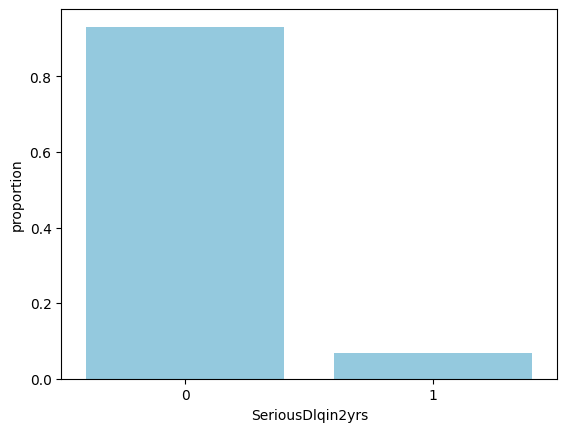

In [7]:
target = 'SeriousDlqin2yrs'
sns.countplot(df, x = target, stat = 'proportion', color = 'skyblue');
df[target].value_counts(True)

Está muy desbalanceado, el 92% no ha tenido ninguna dificultad y el 7% sí. Si no se balancea, el modelo aprenderá a predecir que nadie va a tener dificultades financieras.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

Modelos a considerar:
* Regresión Logística (baseline)
* KNN
* CatBoost

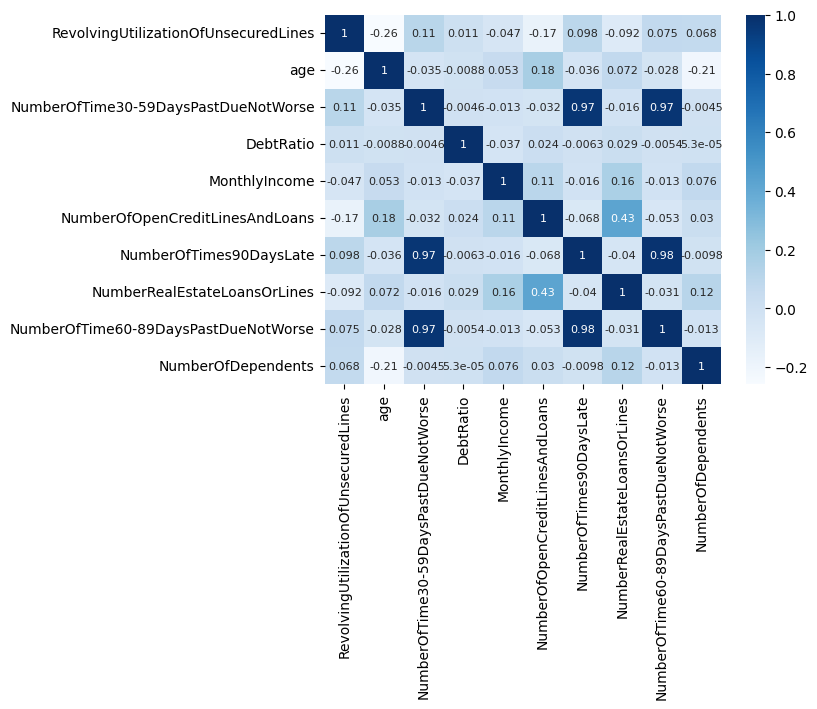

In [15]:
# Limpieza de nulos del dataset

df_copy = df.copy()
df_test = df_copy.dropna()
df_test = df_test.drop(target, axis = 1)

sns.heatmap(df_test.corr(), annot = True, annot_kws = {'size': 8}, cmap = 'Blues');


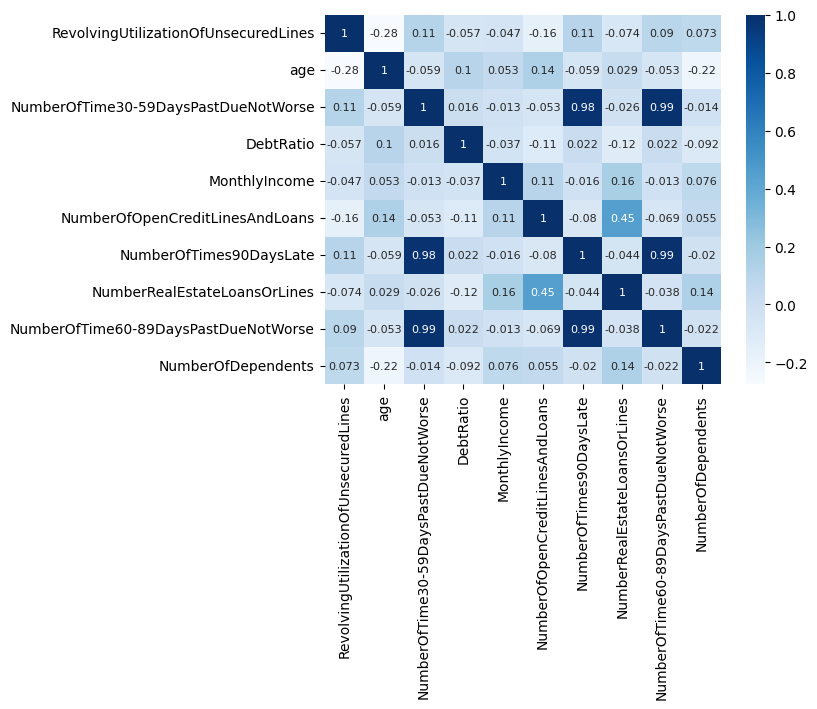

In [16]:
test = df_copy.drop(target, axis = 1)
sns.heatmap(test.corr(), annot = True, annot_kws = {'size': 8}, cmap = 'Blues');

<Axes: xlabel='MonthlyIncome'>

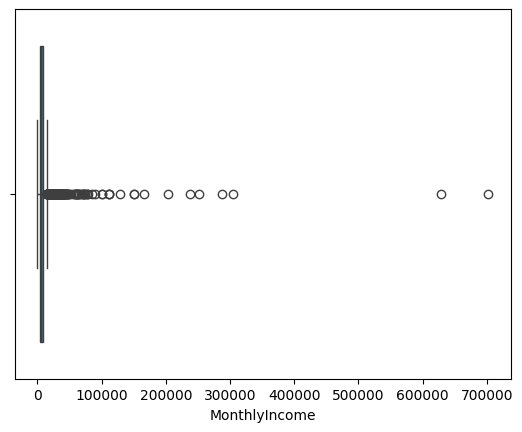

In [17]:
sns.boxplot(df, x = 'MonthlyIncome')